<a href="https://colab.research.google.com/github/shinobu357/TugasMLRaisya/blob/main/UTS/Raisya_Athaya_Kamilah_101032380253_UTS_Klasifikasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mount Gdrive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 3.2 MB/s eta 0:00:00


# Importing Library

In [4]:
# Import library yang dibutuhkan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import category_encoders as ce
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay
from matplotlib.colors import ListedColormap
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
import xgboost as xgb  # Pastikan XGBoost diimpor dengan alias xgb


# Importing Dataset

In [5]:
# Membaca dataset
data = pd.read_csv('/content/drive/MyDrive/UTS ML/car.data.csv')

data.head()


,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


# Mengganti nama kolom

In [6]:
# Memberi nama kolom agar lebih mudah dipahami
data.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

# Menampilkan informasi dasar
data.head()



,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


# Mengecek pada setiap kolom apakah ada yang mengandung missing value

In [7]:
# Check for missing values
data.isnull().sum()

,0
buying,0
maint,0
doors,0
persons,0
lug_boot,0
safety,0
class,0


# Menampilkan informasi umum pada dataset

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


# Mengecek nilai unik pada tiap kolom

In [9]:
# Check unique values in each column to understand the distribution
for col in data.columns:
    print(data[col].value_counts(), end="\n\n")


buying
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64

maint
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64

doors
3        432
4        432
5more    432
2        431
Name: count, dtype: int64

persons
4       576
more    576
2       575
Name: count, dtype: int64

lug_boot
med      576
big      576
small    575
Name: count, dtype: int64

safety
med     576
high    576
low     575
Name: count, dtype: int64

class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64



Kebanyakan kelasnya tidak seimbang pada target class di unacc terlalu dominan, good dan vgood memiliki distribusi yang sangat kecil

# Visualisasi Distribusi Category

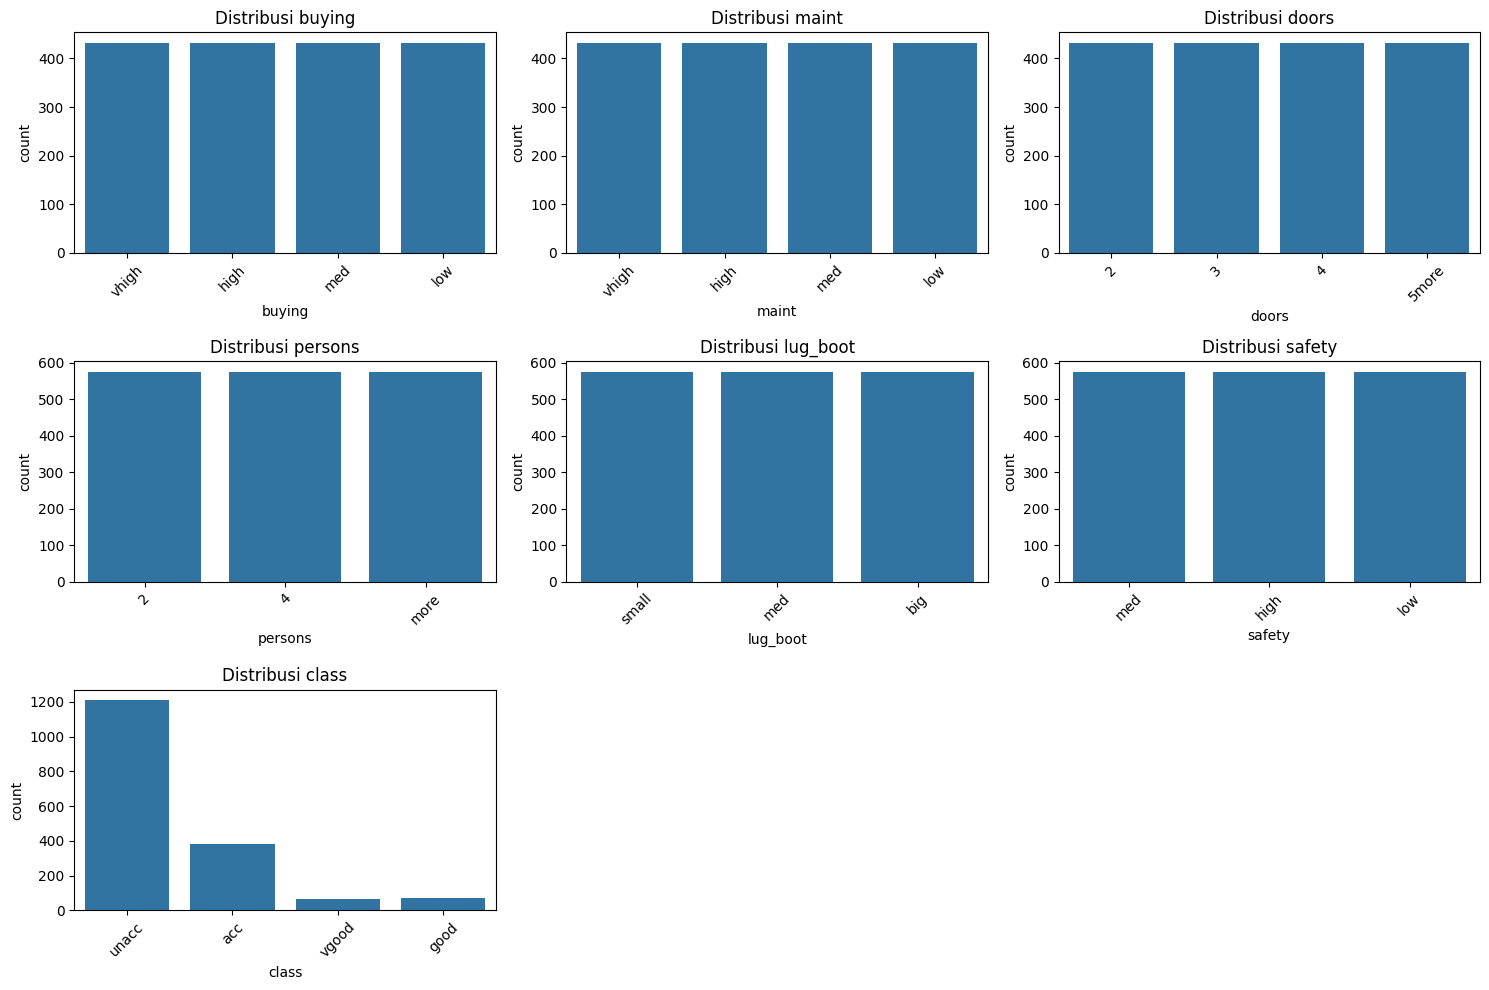

In [10]:
# Visualisasi distribusi kategori untuk setiap kolom
plt.figure(figsize=(15, 10))
for i, col in enumerate(data.columns, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=col, data=data)
    plt.title(f"Distribusi {col}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Versi dalam bentuk visualisasinya yang paling keliatan tidak seimbang kelas adalah di distribusi class

# Visualisasi Distribusi Data Target Class

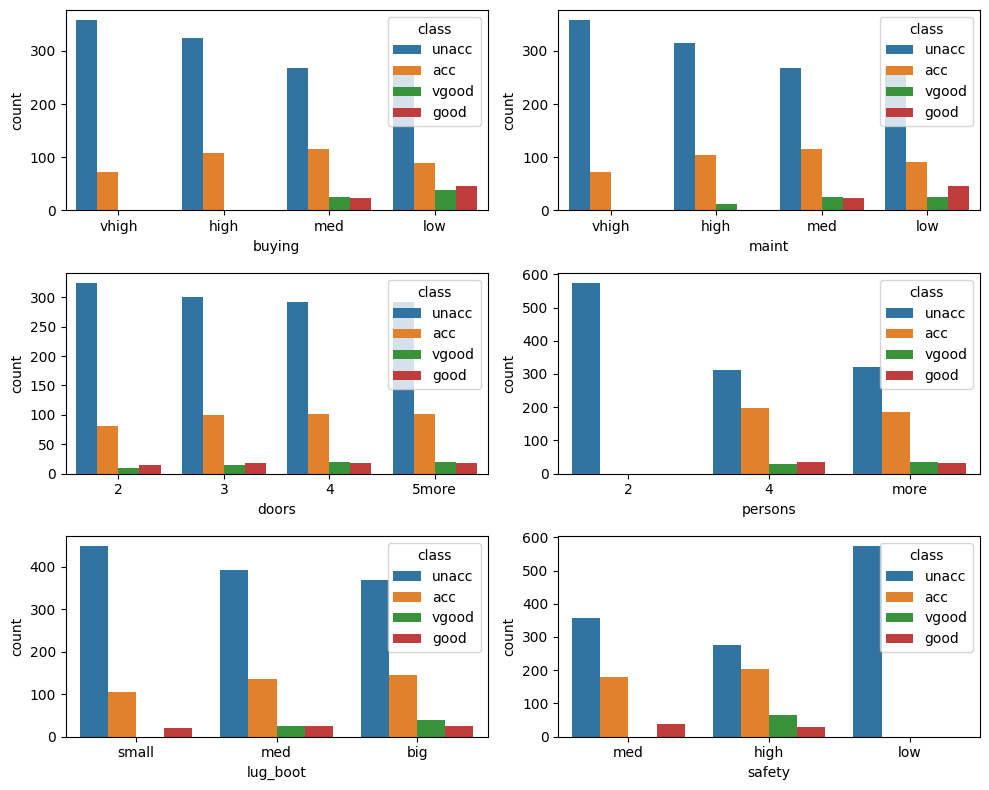

In [11]:
plt.figure(figsize=(10,8))
for i, col in enumerate(data.columns[:-1]):  # Exclude the target column 'class'
    plt.subplot(3, 2, i + 1)  # Adjust number of rows and columns
    sns.countplot(data=data, x=col, hue='class')  # Ensure hue is 'class' to show category distribution

plt.tight_layout()
plt.show()

Menunjukkan kelas uacc mendominasii dihampir semua fitur yang berarti datanya sangat tidak seimbang, fitur safety dan person merupakan fitur penting karena hasil distribusinya lebih bervariasi. Fitur buying dan maint memiliki sedikit kelas good dan vgood di kategori rendah.

#  Menampilkan informasi statistik dasar dari kolom numerik dataset

In [12]:
data.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,3,4,med,med,unacc
freq,432,432,432,576,576,576,1209


Ada 1727 jumlah dataset.

Pada bagian kategori unique:

buying dan maint memiliki 4 kategori masing-masing: vhigh, high, med, low

doors memiliki 4 kategori: 2, 3, 4, 5more

persons memiliki 3 kategori: 2, 4, more

lug_boot memiliki 3 kategori: small, med, big.

safety memiliki 3 kategori: low, med, high.

class (target) memiliki 4 kategori: unacc, acc, good, vgood


Pada bagian kategori Top:
buying dan maint: Kategori paling sering muncul adalah "high" dengan 432 kali kemunculan

doors: Kategori paling sering muncul adalah "3" dengan 432 kali kemunculan

persons: Kategori paling sering muncul adalah "4" dengan 576 kali kemunculan

lug_boot: Kategori paling sering muncul adalah "med" dengan 576 kali kemunculan

safety: Kategori paling sering muncul adalah "med" dengan 576 kali kemunculan

class: Kategori paling sering muncul adalah "unacc" dengan 1209 kali kemunculan

Pada bagian kategori freq:
"unacc" adalah kelas yang paling sering muncul di target (1209/1727 ≈ 70%), menunjukkan adanya ketidakseimbangan kelas.

Sebagian besar data berada di kategori "med" untuk lug_boot dan safety, serta kategori "4" untuk persons.


# Menghapus data duplicate

In [13]:
data.drop_duplicates()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


menghapus baris duplikat dari dataset, sehingga hanya menyisakan baris-baris yang unik dan dapat seimbang

# Definisi data input dan target

In [14]:
X = data.drop(['class'], axis=1)
y = data['class']

Berisi semua kolom dari data, kecuali kolom class yang digunakan untuk membuat prediksi. Targetnya Berisi hanya kolom class

# Splitting dataset

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y)

Membagi dataset 80% training dan 20% testing dan menggunakan stratify bertujuan Membagi data berdasarkan proporsi kelas pada kolom y (target), jadi distribusi kelas pada data training dan testing akan seimbang

# Mengecek jumlah data

In [16]:
print(y_test.value_counts())

class
unacc    242
acc       77
good      14
vgood     13
Name: count, dtype: int64


# Mapping kolom

In [17]:
mapping = [{'col':'buying', 'mapping':{'low':0, 'med':1, 'high':2, 'vhigh':3}},
          {'col':'maint', 'mapping':{'low':0, 'med':1, 'high':2, 'vhigh':3}},
          {'col':'doors', 'mapping':{'2':0, '3':1, '4':2, '5more':3}},
          {'col':'persons', 'mapping':{'2':0, '4':1, 'more':2}},
          {'col':'lug_boot', 'mapping':{'small':0, 'med':1, 'big':2}},
          {'col':'safety', 'mapping':{'low':0, 'med':1, 'high':2}}]

Mendefinisikan angka dengan kolom agar dapat memperjelas nilai kategorikal

# Encoding kolom

In [18]:
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'], mapping = mapping)

X_train = encoder.fit_transform(X_train)
X_test = encoder.fit_transform(X_test)

Mengubah nilai kategorikal pada kolom tertentu menjadi nilai numerik menggunakan OrdinalEncoder

# Oversampling

In [19]:
sm = SMOTE(random_state=42)

# Apply SMOTE to balance the classes in the training set
X_train, y_train = sm.fit_resample(X_train, y_train)

 Pakai Teknik SMOTE (oversampling) untuk menangani ketidakseimbangan kelas dengan cara Memilih satu data dari kelas minoritas, Memilih tetangga terdekat dari data tersebut, kemudian Membuat sampel baru dengan interpolasi antara data dan tetangganya.

In [20]:
print(y_train.value_counts())

class
acc      967
unacc    967
good     967
vgood    967
Name: count, dtype: int64


Sudah sama atau seimbang jumlah distribusi class

Precision: mengukur seberapa akurat prediksi positif dari model

Recall: mengukur seberapa banyak data positif yang berhasil ditemukan oleh model.

F1-Score: rata-rata harmonis antara precision dan recall

Support: menunjukkan jumlah sampel sebenarnya (ground truth) untuk setiap kelas dalam dataset atau memastikan pada ketidakseimbangan kelas.

# Logistic Regression

Best Parameters for Logistic Regression: {'classifier__C': 1, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}
Logistic Regression Accuracy: 0.7947976878612717
              precision    recall  f1-score   support

         acc       0.61      0.71      0.66        77
        good       0.50      1.00      0.67        14
       unacc       0.96      0.80      0.87       242
       vgood       0.50      1.00      0.67        13

    accuracy                           0.79       346
   macro avg       0.64      0.88      0.72       346
weighted avg       0.84      0.79      0.81       346



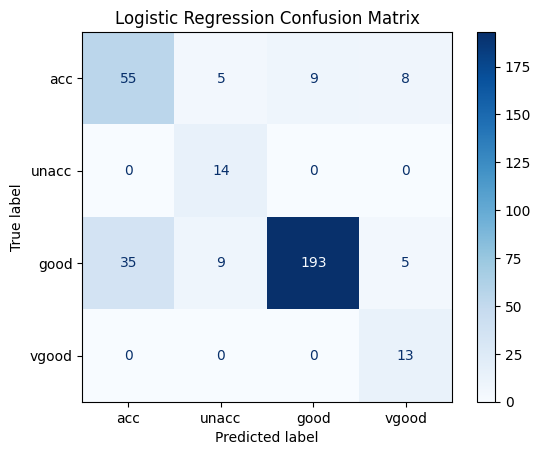

Class acc - TP: 55, FP: 35, FN: 22, TN: 234
Class unacc - TP: 14, FP: 14, FN: 0, TN: 318
Class good - TP: 193, FP: 9, FN: 49, TN: 95
Class vgood - TP: 13, FP: 13, FN: 0, TN: 320


In [21]:
# Logistic Regression Model with hyperparameter tuning
logreg_pipeline = Pipeline([
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

# Define the hyperparameter grid
param_grid_logreg = {
    'classifier__C': [0.1, 1, 10],  # Regularization strength
    'classifier__penalty': ['l2'],  # Type of regularization (l1 or l2)
    'classifier__solver': ['lbfgs', 'liblinear']  # Optimization algorithm
}

# GridSearchCV for hyperparameter tuning
grid_search_logreg = GridSearchCV(logreg_pipeline, param_grid_logreg, cv=5, n_jobs=-1)
grid_search_logreg.fit(X_train, y_train)

# Best model and parameters
print("Best Parameters for Logistic Regression:", grid_search_logreg.best_params_)

# Predict the test set
y_pred_logreg = grid_search_logreg.predict(X_test)

# Evaluate the model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy: {accuracy_logreg}")
print(classification_report(y_test, y_pred_logreg))

# Calculate confusion matrix
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)

ConfusionMatrixDisplay(conf_matrix_logreg, display_labels=y_train.unique()).plot(cmap="Blues")
plt.title('Logistic Regression Confusion Matrix')
plt.show()

# Calculate TP, TN, FP, FN for each class
for i in range(conf_matrix_logreg.shape[0]):  # Loop through each class
    TP = conf_matrix_logreg[i, i]  # True Positive
    FP = conf_matrix_logreg[:, i].sum() - TP  # False Positive
    FN = conf_matrix_logreg[i, :].sum() - TP  # False Negative
    TN = conf_matrix_logreg.sum() - (TP + FP + FN)  # True Negative

    print(f"Class {y_train.unique()[i]} - TP: {TP}, FP: {FP}, FN: {FN}, TN: {TN}")

grid hyperparameter yang akan diuji menggunakan GridSearchCV.

C: Kontrol kekuatan regularisasi

penalty: Jenis regularisasi

solver: Algoritma optimisasi yang digunakan


Memperoleh akurasi model 79% , Memiliki TP paling dominan prediksi kelas dengan benar di kelas good, namun banyak kesalahan prediksi


# Decision Tree

Decision Tree Accuracy: 0.8323699421965318
              precision    recall  f1-score   support

         acc       0.66      0.57      0.61        77
        good       0.39      1.00      0.56        14
       unacc       1.00      0.90      0.95       242
       vgood       0.50      1.00      0.67        13

    accuracy                           0.83       346
   macro avg       0.64      0.87      0.70       346
weighted avg       0.88      0.83      0.85       346



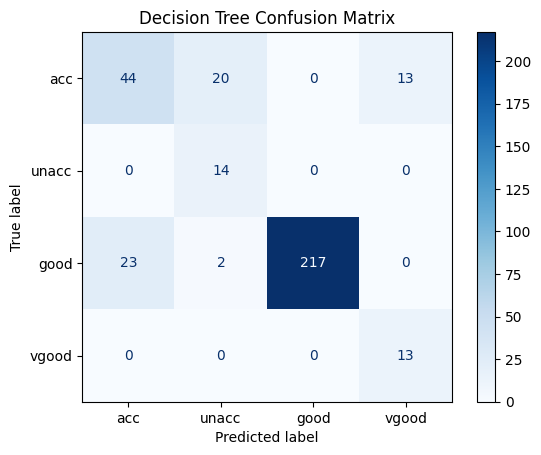

Class acc - TP: 44, FP: 23, FN: 33, TN: 246
Class unacc - TP: 14, FP: 22, FN: 0, TN: 310
Class good - TP: 217, FP: 0, FN: 25, TN: 104
Class vgood - TP: 13, FP: 13, FN: 0, TN: 320


In [22]:
# Decision Tree Model dengan max_depth
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

# Predict the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt}")
print(classification_report(y_test, y_pred_dt))

# Calculate confusion matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

# Display confusion matrix with blue color map
ConfusionMatrixDisplay(conf_matrix_dt, display_labels=y_train.unique()).plot(cmap="Blues")
plt.title('Decision Tree Confusion Matrix')
plt.show()

# Calculate TP, TN, FP, FN for each class
for i in range(conf_matrix_dt.shape[0]):  # Loop through each class
    TP = conf_matrix_dt[i, i]  # True Positive
    FP = conf_matrix_dt[:, i].sum() - TP  # False Positive
    FN = conf_matrix_dt[i, :].sum() - TP  # False Negative
    TN = conf_matrix_dt.sum() - (TP + FP + FN)  # True Negative

    print(f"Class {y_train.unique()[i]} - TP: {TP}, FP: {FP}, FN: {FN}, TN: {TN}")

memperoleh Akurasi model 83%, paling dominan memprediksi benar di kelas good, masih banyak kesalahan prediksi kelas

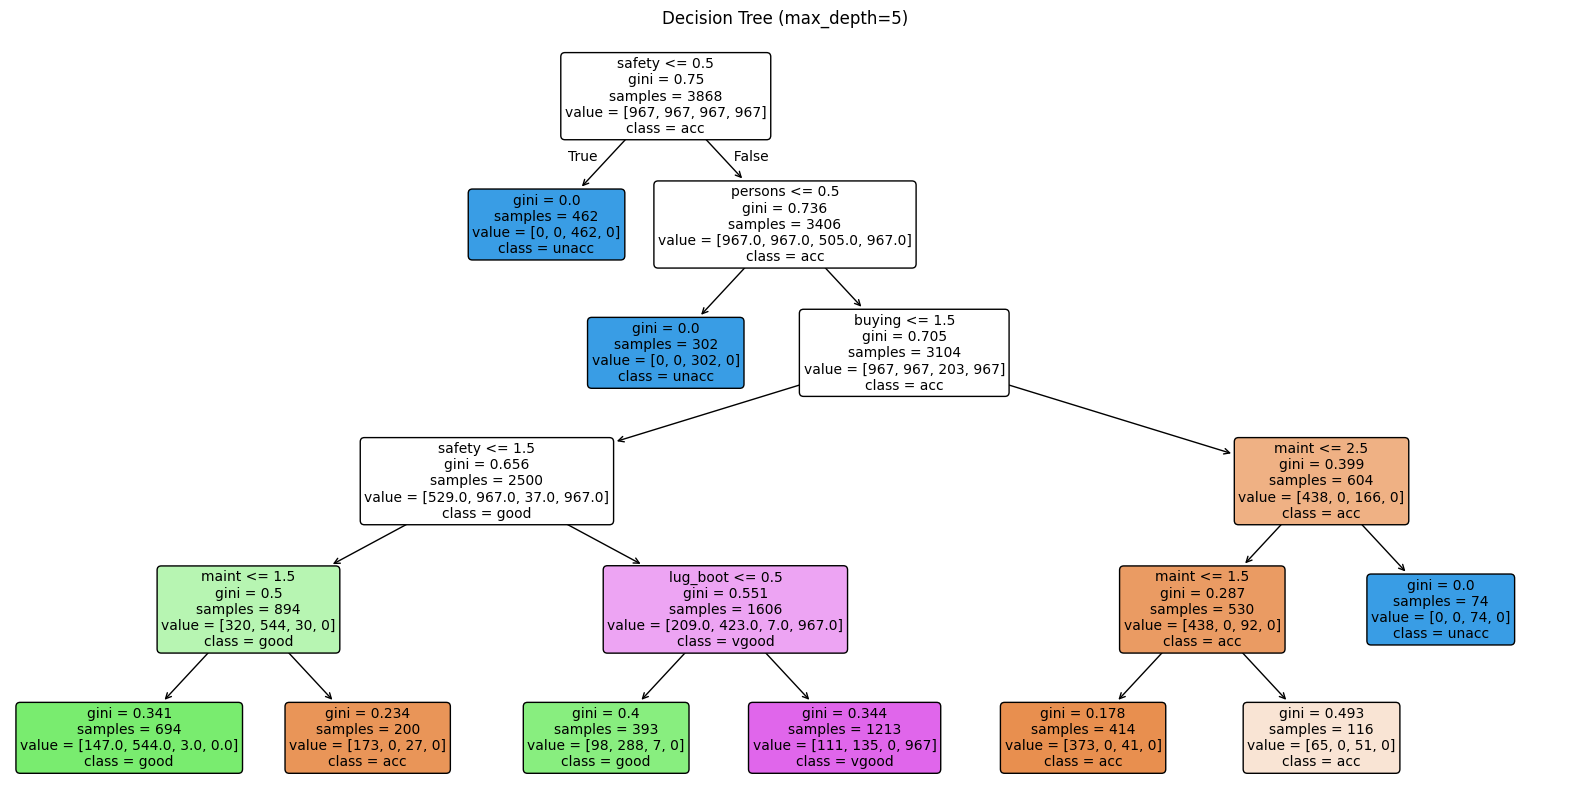

In [23]:
# Membuat model Decision Tree dengan max_depth=5
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

# Visualisasi Decision Tree
plt.figure(figsize=(20, 10))  # Ukuran gambar
plot_tree(
    dt_model,
    feature_names=X.columns,  # Nama fitur
    class_names=dt_model.classes_,  # Nama kelas
    filled=True,  # Warna node berdasarkan kelas
    rounded=True,  # Node berbentuk bulat
    fontsize=10  # Ukuran font
)
plt.title("Decision Tree (max_depth=5)")
plt.show()


fitur safety paling penting dan menjadi split pertama (akar pohon), diikuti oleh fitur persons, buying, maint, dan lug_boot. fitur-fitur tersebut sangat memengaruhi keputusan klasifikasi. Beberapa fitur nilai gini nya 0 (di node biru) yang berarti Node sangat murni (homogen), semua data berasal dari satu kelas. Namun ada beberapa yang tidak homogen gininya lebih dari 0 (selain biru) yang berarti ada data bercampur dari beberapa kelas.

# K-NN

k-NN Accuracy: 0.8439306358381503
              precision    recall  f1-score   support

         acc       0.69      0.79      0.74        77
        good       0.39      1.00      0.56        14
       unacc       0.99      0.85      0.91       242
       vgood       0.85      0.85      0.85        13

    accuracy                           0.84       346
   macro avg       0.73      0.87      0.76       346
weighted avg       0.89      0.84      0.86       346



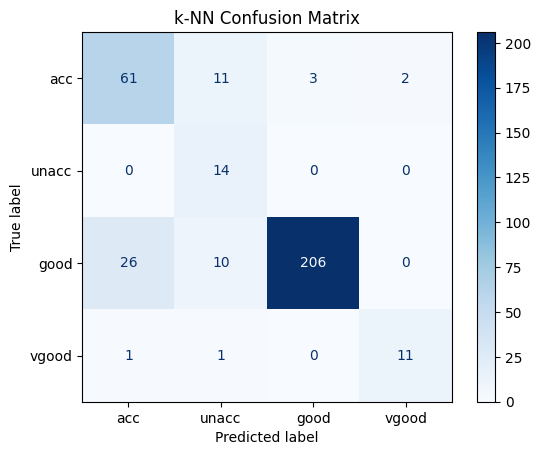

Class acc - TP: 61, FP: 27, FN: 16, TN: 242
Class unacc - TP: 14, FP: 22, FN: 0, TN: 310
Class good - TP: 206, FP: 3, FN: 36, TN: 101
Class vgood - TP: 11, FP: 2, FN: 2, TN: 331


In [24]:
# k-NN Model dengan n_neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predict the test set
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"k-NN Accuracy: {accuracy_knn}")
print(classification_report(y_test, y_pred_knn))

# Calculate confusion matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Display confusion matrix with blue color map
ConfusionMatrixDisplay(conf_matrix_knn, display_labels=y_train.unique()).plot(cmap="Blues")
plt.title('k-NN Confusion Matrix')
plt.show()

# Calculate TP, TN, FP, FN for each class
for i in range(conf_matrix_knn.shape[0]):  # Loop through each class
    TP = conf_matrix_knn[i, i]  # True Positive
    FP = conf_matrix_knn[:, i].sum() - TP  # False Positive
    FN = conf_matrix_knn[i, :].sum() - TP  # False Negative
    TN = conf_matrix_knn.sum() - (TP + FP + FN)  # True Negative

    print(f"Class {y_train.unique()[i]} - TP: {TP}, FP: {FP}, FN: {FN}, TN: {TN}")

Memperoleh akurasi model 84% , paling dominan memprediksi benar di kelas good, masih ada kesalahan prediksi kelas

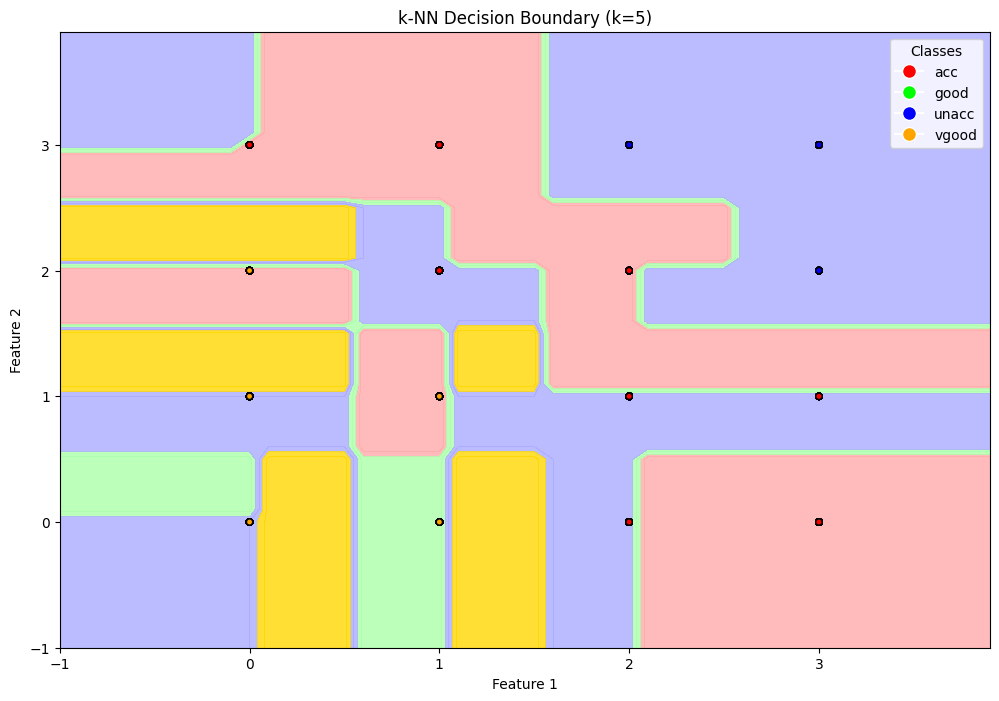

In [25]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)  # Encode target labels

# Ambil dua fitur pertama untuk visualisasi
X_train_vis = X_train.iloc[:, :2].values  # Menggunakan dua fitur pertama
X_test_vis = X_test.iloc[:, :2].values

# Latih ulang model k-NN dengan dua fitur pertama dan target numerik
knn_model_vis = KNeighborsClassifier(n_neighbors=5)
knn_model_vis.fit(X_train_vis, y_train_encoded)

# Tentukan batas grid untuk area plot
x_min, x_max = X_train_vis[:, 0].min() - 1, X_train_vis[:, 0].max() + 1
y_min, y_max = X_train_vis[:, 1].min() - 1, X_train_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Prediksi seluruh grid
Z = knn_model_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(12, 8))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#FFD700'])  # Warna untuk area
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF', '#FFA500'])   # Warna untuk titik
plt.contourf(xx, yy, Z, alpha=0.8, cmap=cmap_light)

# Plot data training
scatter = plt.scatter(
    X_train_vis[:, 0], X_train_vis[:, 1], c=y_train_encoded,
    cmap=cmap_bold, edgecolor='k', s=20
)

# Tambahkan label dan judul
plt.title('k-NN Decision Boundary (k=5)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Tambahkan legenda
unique_classes = label_encoder.classes_
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap_bold(i), markersize=10)
           for i in range(len(unique_classes))]
plt.legend(handles, unique_classes, loc="upper right", title="Classes")

# Tampilkan plot
plt.show()

Titik warna = data training
Warna titik = menunjukkan kelas sebenarnya
Warna Area = menunjukkan Prediksi Model

Model bekerja dengan baik, karena sebagian besar titik sesuai dengan warna area.
Namun ada Kesalahan prediksi mungkin terjadi di area perbatasan antara warna contohnya pada titik kuning(vgood) ada di area unacc

In [27]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# XGBOOST

XGBoost Accuracy: 0.9797687861271677
              precision    recall  f1-score   support

         acc       0.94      0.97      0.96        77
        good       0.88      1.00      0.93        14
       unacc       1.00      0.98      0.99       242
       vgood       1.00      1.00      1.00        13

    accuracy                           0.98       346
   macro avg       0.95      0.99      0.97       346
weighted avg       0.98      0.98      0.98       346

Class acc - TP: 75, FP: 5, FN: 2, TN: 264
Class unacc - TP: 14, FP: 2, FN: 0, TN: 330
Class good - TP: 237, FP: 0, FN: 5, TN: 104
Class vgood - TP: 13, FP: 0, FN: 0, TN: 333


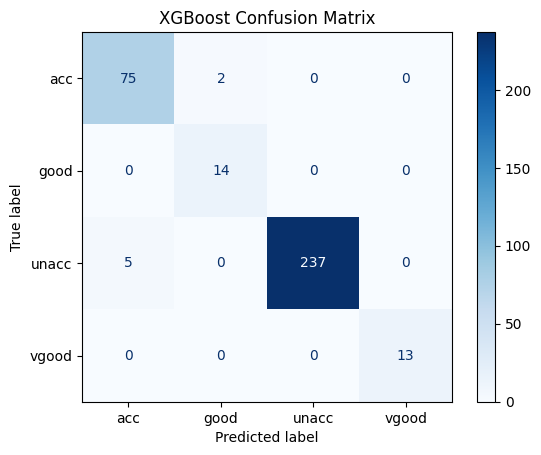

In [28]:
# XGBoost Model with max_depth and n_estimators
xgb_model = XGBClassifier(
    max_depth=5,               # Limit depth of trees
    n_jobs = 4,            # Number of trees
    learning_rate=0.1,
    random_state=42,
    eval_metric='mlogloss'     # Evaluation metric
)

xgb_model.fit(X_train, y_train_encoded)

# Predict the test set
y_pred_xgb = xgb_model.predict(X_test)

# Decode predictions back to the original labels
y_pred_xgb_decoded = label_encoder.inverse_transform(y_pred_xgb)
y_test_decoded = label_encoder.inverse_transform(y_test_encoded)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb_decoded)
print(f"XGBoost Accuracy: {accuracy_xgb}")
print(classification_report(y_test, y_pred_xgb_decoded))

# Calculate confusion matrix
conf_matrix_xgb = confusion_matrix(y_test_decoded, y_pred_xgb_decoded)

# Calculate TP, TN, FP, FN for each class
for i in range(conf_matrix_xgb.shape[0]):  # Loop through each class
    TP = conf_matrix_xgb[i, i]  # True Positive
    FP = conf_matrix_xgb[:, i].sum() - TP  # False Positive
    FN = conf_matrix_xgb[i, :].sum() - TP  # False Negative
    TN = conf_matrix_xgb.sum() - (TP + FP + FN)  # True Negative

    print(f"Class {y_train.unique()[i]} - TP: {TP}, FP: {FP}, FN: {FN}, TN: {TN}")
# Display confusion matrix with blue color map
ConfusionMatrixDisplay(conf_matrix_xgb, display_labels=label_encoder.classes_).plot(cmap="Blues")
plt.title('XGBoost Confusion Matrix')
plt.show()


n_estimators=100: Menambahkan lebih banyak pohon ke dalam model, memungkinkan ensemble untuk mempelajari lebih banyak pola.

learning_rate=0.1: Mengurangi ukuran langkah pembaruan setiap pohon, menghasilkan model yang lebih stabil.

subsample=0.8 dan colsample_bytree=0.8: Membatasi jumlah data dan fitur yang digunakan di setiap pohon untuk mencegah overfitting

Memperoleh akurasi model 97%, paling dominan prediksi benar di kelas unacc dan memiliki minimnya kesalahan prediksi diantara pipeline lainnya

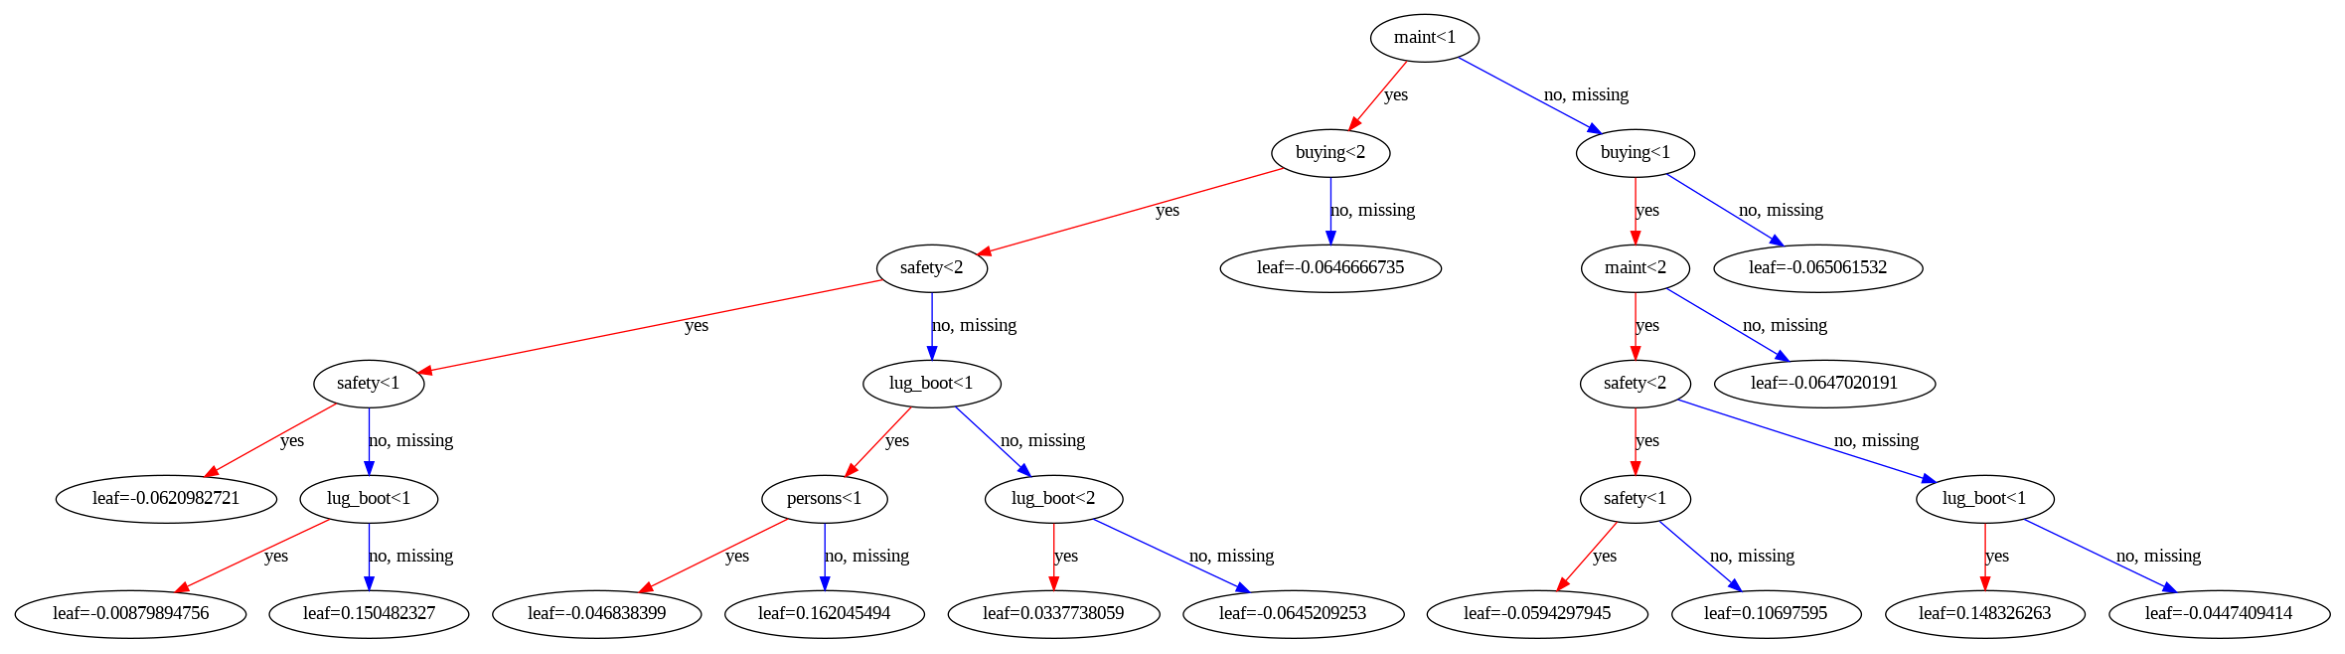

In [29]:
# Plot a specific tree in the XGBoost model
fig, ax = plt.subplots(figsize=(30, 30))
xgb.plot_tree(xgb_model, num_trees=5, ax=ax)  # Sesuaikan num_trees untuk memilih pohon
plt.show()

buying adalah fitur yang paling berpengaruh dalam tree ini, diikuti oleh persons, lug_boot, dan doors. Model sederhana dengan jalur keputusan yang jelas, tetapi tetap efektif memisahkan data.

# Kesimpulan

Berdasarkan hasil evaluasi dapat disimpulkan bahwa untuk kasus dataset ini pipeline yang memiliki hasil atau akurasi terbaik adalah XGBOOST di akurasi 97% dan memiliki kinerja yang hampir sempurna di semua metrik yang berarti lebih cocok untuk kasus dataset ini. Kemudian untuk kasus dataset ini dapat menunjukkan model sangat mampu menangani data yang tidak seimbang serta memiliki generalisasi yang sangat baik.

Link Youtube: https://youtu.be/eQQOHM-w3EE